In [ ]:
#it takes too much time to run this thing 

In [16]:
from _Setup import *

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

In [25]:
train = pd.read_csv(missForestTrainFile)
submission_data = pd.read_csv(rawSubmissionFile)
test = pd.read_pickle(missForestTestFile)

In [26]:
#Separating columns 
X = train.drop(columns=['Unit2','Unnamed: 0', 'HospAdmTime','SepsisLabel', 'time'])  
y = train['SepsisLabel']

In [27]:
X.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Potassium,Hct,Hgb,WBC,Platelets,Age,ICULOS,patient,Gender,Unit1
0,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.868277,0.422033,0.740608,0.373687,-0.431184,-0.299413,-0.807406,16426,1.0,0.0
1,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,0.340467,...,0.868277,0.422033,0.740608,0.373687,-0.431184,-0.299413,-0.782578,16426,1.0,0.0
2,-0.320708,0.592277,-0.914129,-0.428503,0.299849,0.716228,-1.294263,0.045536,-0.000054,0.710267,...,0.868277,0.422033,0.740608,0.373687,-0.431184,-0.299413,-0.757751,16426,1.0,0.0
3,-0.376464,0.906747,-0.531932,-0.471343,0.053772,0.346308,-1.294263,-0.768098,-0.000054,-0.029333,...,0.868277,0.422033,0.740608,0.373687,-0.431184,-0.299413,-0.732923,16426,1.0,0.0
4,-0.710999,0.906747,-0.531932,-0.342823,-0.130785,0.050372,-1.479445,-0.768098,-0.014687,-0.029333,...,0.868277,0.422033,0.740608,0.373687,-0.431184,-0.299413,-0.708095,16426,1.0,0.0


In [5]:
#k = 10  # Adjust this number based on your needs
#selector = SelectKBest(score_func=f_classif, k=k)
#X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
#selected_features = X.columns[selector.get_support()]
#print("Selected Features:", selected_features)

In [6]:
# selecting variables 
#selected_columns = ['ICULOS', 'Temp', 'Resp', 'BaseExcess']
selected_columns = ['ICULOS']
X_selected = X[selected_columns]

In [ ]:
# take a sample from the data 

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear') 
model.fit(X_selected, y)

In [ ]:
y_pred = model.predict(test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

In [ ]:
submission_data['SepsisLabel'] = y_pred_test

# Optionally, save the modified DataFrame to a CSV file
# TODO : create a variable for this path in _Setup.py
# submission_data.to_csv('submission_data_with_predictions.csv', index=False)

# Display the updated DataFrame (optional)
print(submission_data.head())

In [ ]:
num_rows = submission_data.shape[0]
print("Number of rows in submission_data:", num_rows)

In [ ]:
print("\nClassification Report (Training):\n", classification_report(y_train, y_pred_train))

# Alternative Models
## Generalized Estimating Equations 

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE

In [29]:
y = train['SepsisLabel'] 
#X = train['ICULOS', 'HR', 'Temp', 'BaseExcess']
X = train[['ICULOS', 'O2Sat', 'Resp', 'Temp', 'HR', 'FiO2', 'BUN', 'time', 
            'Platelets', 'patient', 'WBC', 'MAP', 'Creatinine', 'BaseExcess', 
            'Age', 'PaCO2', 'pH', 'SBP', 'Calcium', 'DBP', 'Magnesium', 
            'Potassium', 'Hct', 'Hgb', 'Glucose']]



# Add a constant to the model (intercept)
X = sm.add_constant(X)


groups = train['patient']  

model = GEE(y, X, groups=groups, family=sm.families.Binomial())
results = model.fit()

print(results.summary())

                               GEE Regression Results                              
Dep. Variable:                 SepsisLabel   No. Observations:              1389147
Model:                                 GEE   No. clusters:                    28235
Method:                        Generalized   Min. cluster size:                   8
                      Estimating Equations   Max. cluster size:                 728
Family:                           Binomial   Mean cluster size:                49.2
Dependence structure:         Independence   Num. iterations:                     7
Date:                     Thu, 31 Oct 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         18:20:38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4155      0.048    -29.497      0.000      -1.510      -1.321
ICULOS 

C:\Users\Marin\anaconda3\envs\sepsis\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88   1068575
         1.0       0.67      0.23      0.34    320572

    accuracy                           0.80   1389147
   macro avg       0.74      0.60      0.61   1389147
weighted avg       0.78      0.80      0.75   1389147

AUC-ROC: 0.7569


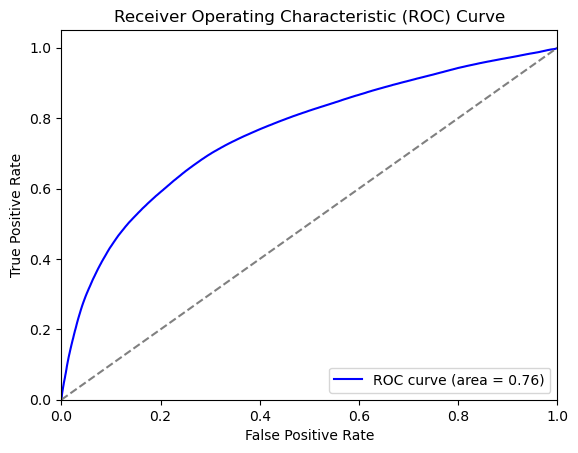

In [30]:
X_test = test[['ICULOS', 'O2Sat', 'Resp', 'Temp', 'HR', 'FiO2', 'BUN', 'time', 
            'Platelets', 'patient', 'WBC', 'MAP', 'Creatinine', 'BaseExcess', 
            'Age', 'PaCO2', 'pH', 'SBP', 'Calcium', 'DBP', 'Magnesium', 
            'Potassium', 'Hct', 'Hgb', 'Glucose']]
X_test = sm.add_constant(X_test)

# Make predictions on the test data
predicted_probs_test = results.predict(X_test)
predicted_classes_test = (predicted_probs_test >= 0.5).astype(int)


predicted_probs = results.predict(X)
predicted_classes = (predicted_probs >= 0.5).astype(int)  # Convert probabilities to binary classes

# Evaluate the model
print(classification_report(y, predicted_classes))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y, predicted_probs)
print(f'AUC-ROC: {roc_auc:.4f}')

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
submission_data['SepsisLabel'] = predicted_classes
submission_data.head()

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0


In [32]:
submission_data.to_csv("../Data/rawData/GEE_submission.csv", index = False)